In [68]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [69]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

In [70]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)

(1282, 2) (1295, 2)


In [71]:
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

In [72]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)

(925, 2)


In [73]:
#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

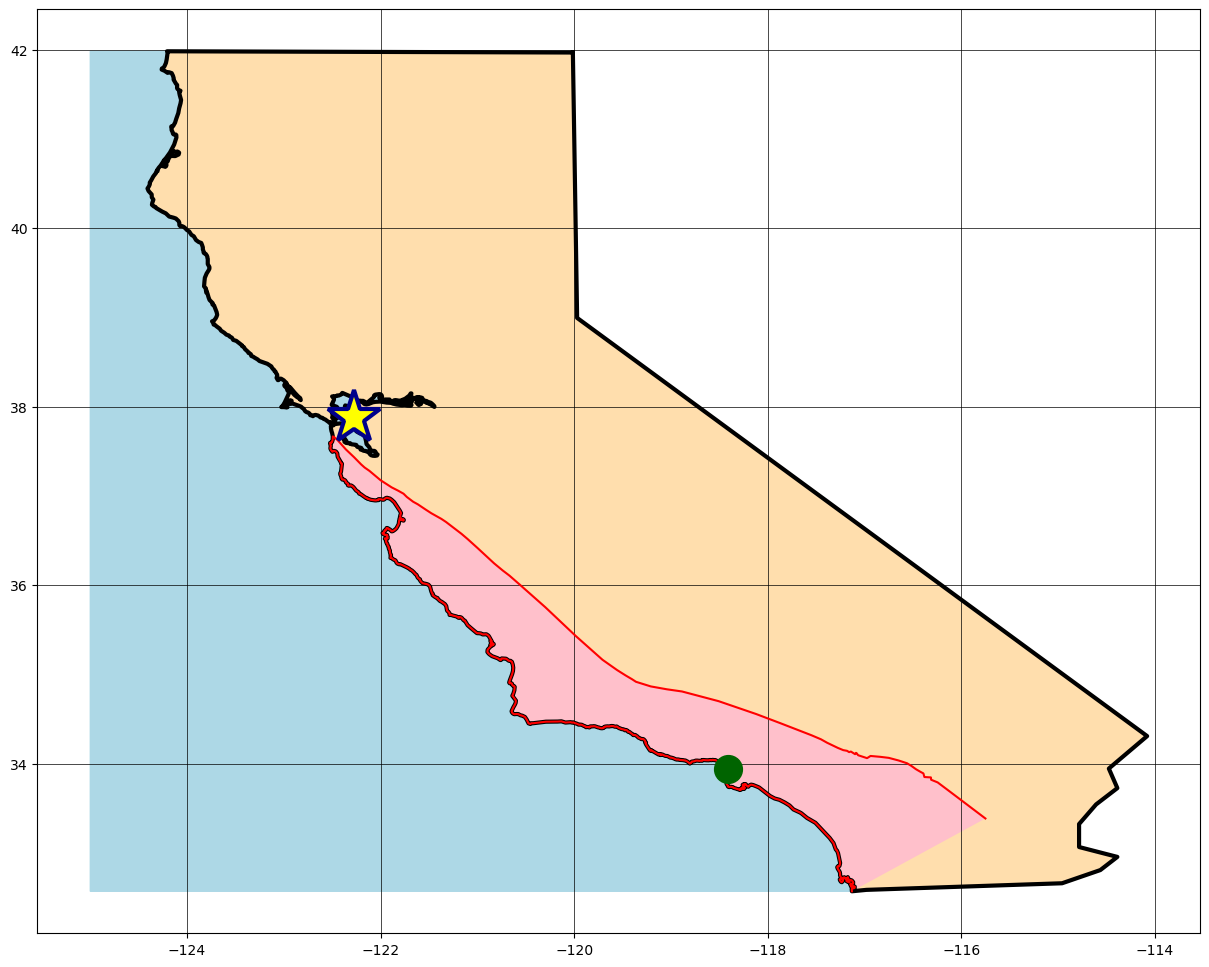

In [74]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

Part 3

a)

In [75]:
import math
import numpy as np

R = 6.378e6
lat0 = 33 + 56/60 + 38.89/3600
long0 = -(118 + 24/60 + 9.04/3600)

degLat = 2 * math.pi * 6378.14 / 360
degLon = math.pi * np.cos(np.radians(35.5)) * 6378.14 / 180

for Myr in [1, 5, 25]:
    meters_moved = 35 * Myr * 1e6 / 1000 / 1000

    dx = meters_moved * math.cos(math.radians(32))
    dy = meters_moved * math.sin(math.radians(32))

    dLat = dy / degLat
    dLon = -dx / degLon

    lat_new = lat0 + dLat
    lon_new = long0 + dLon

    print(f"Coords after {Myr} Myr: lat={lat_new:.4f}, lon={lon_new:.4f}")

Coords after 1 Myr: lat=34.1107, lon=-118.7300
Coords after 5 Myr: lat=34.7772, lon=-120.0401
Coords after 25 Myr: lat=38.1094, lon=-126.5904


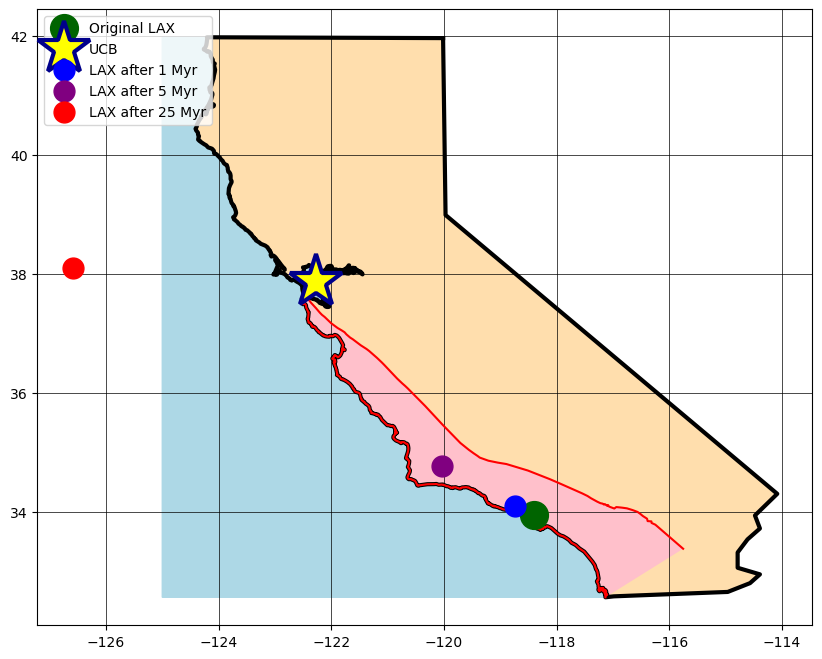

In [76]:
lat0 = 33 + 56/60 + 38.89/3600
lon0 = -(118 + 24/60 + 9.04/3600)

degLat = 2 * math.pi * 6378.14 / 360
degLon = math.pi * np.cos(np.radians(35.5)) * 6378.14 / 180

def moved_coords(Myr):
    dist = 35 * Myr * 1e6 / 1000 / 1000
    dx = dist * math.cos(math.radians(32))
    dy = dist * math.sin(math.radians(32))
    return lat0 + dy/degLat, lon0 - dx/degLon

lat_orig, lon_orig = lat0, lon0
lat_1, lon_1 = moved_coords(1)
lat_5, lon_5 = moved_coords(5)
lat_25, lon_25 = moved_coords(25)

plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(CAB[:,0], CAB[:,1], 'k-', lw=3)
plt.fill(CAB[:,0], CAB[:,1], 'navajowhite')

plt.fill(ocean[:,0], ocean[:,1], '-', color='lightblue')
plt.plot(plate[:,0], plate[:,1], 'r-')
plt.fill(plate[:,0], plate[:,1], 'pink')

plt.plot(lon_orig, lat_orig, 'o', color='darkgreen', ms=20, label="Original LAX")
plt.plot(lon_UCB, lat_UCB, '*', mec='darkblue', mew=3, mfc='yellow', ms=40, label="UCB")

plt.plot(lon_1, lat_1, 'o', color='blue', ms=15, label="LAX after 1 Myr")
plt.plot(lon_5, lat_5, 'o', color='purple', ms=15, label="LAX after 5 Myr")
plt.plot(lon_25, lat_25, 'o', color='red', ms=15, label="LAX after 25 Myr")

plt.legend(loc="upper left")
plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()


b)

In [77]:
degLat = 2 * math.pi * R / 360

distance = ((37 + 52/60 + 19.54/3600) - lat0) * degLat
v_north = (35 / 1000 / 1000) * math.sin(math.radians(32))
time_myr = (north_distance / v_north) / 1e6

print(f"Years until same latitude: {time_myr:.2f} million years")

Years until same latitude: 23.58 million years
